# DataAnalysis

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

data = pd.read_csv('promptCount(AllData).csv', delimiter=';')

print(data.head())

         Exam Set With AI Participant  Task 1 Task 2 Task 3  Task 4  Task 5  \
0  Advertisements     Yes      Philip  107, 1  91, 1  69, 1  114, 1  146, 1   
1          Robots      No      Philip     122    157     76     131     235   
2  Advertisements     Yes      Mattej     149    138    199  404, 2  107, 1   
3          Robots      No      Mattej     126     96     58     207     125   
4  Advertisements     Yes    Micheala  106, 1   5, 1  98, 1  114, 1   94, 1   

  Task 6 Task 7 Task 8 Task 9  
0  58, 1  96, 1    NaN    NaN  
1     42    224    421      4  
2    330    338    NaN    NaN  
3     40    277    506    163  
4  54, 1    NaN    NaN    NaN  


## Calculate time and prompts

In [65]:
# Define a function to calculate total time spent
def calculate_total_time(row):
    total_time = 0
    for task in row:
        if isinstance(task, str):
            if ',' in task:
                time_str, _ = task.split(',')
                total_time += int(time_str)
            else:
                total_time += int(task)  # Handle case where there's only a time value
    return total_time

# Define a function to calculate total prompt count
def calculate_total_prompt(row):
    total_prompt = 0
    for task in row:
        if isinstance(task, str) and ',' in task:
            _, prompt_str = task.split(',')
            total_prompt += int(prompt_str)
    return total_prompt

data['Total_Time'] = data.iloc[:, 3:].apply(calculate_total_time, axis=1)
data['Total_Prompt_Count'] = data.iloc[:, 3:].apply(calculate_total_prompt, axis=1)
data['Total_Time_Minutes'] = (data['Total_Time'] / 60).round(0)


print(data.head())


         Exam Set With AI Participant  Task 1 Task 2 Task 3  Task 4  Task 5  \
0  Advertisements     Yes      Philip  107, 1  91, 1  69, 1  114, 1  146, 1   
1          Robots      No      Philip     122    157     76     131     235   
2  Advertisements     Yes      Mattej     149    138    199  404, 2  107, 1   
3          Robots      No      Mattej     126     96     58     207     125   
4  Advertisements     Yes    Micheala  106, 1   5, 1  98, 1  114, 1   94, 1   

  Task 6 Task 7 Task 8 Task 9  Total_Time  Total_Prompt_Count  \
0  58, 1  96, 1    NaN    NaN         681                   7   
1     42    224    421      4        1412                   0   
2    330    338    NaN    NaN        1665                   3   
3     40    277    506    163        1598                   0   
4  54, 1    NaN    NaN    NaN         471                   6   

   Total_Time_Minutes  
0                11.0  
1                24.0  
2                28.0  
3                27.0  
4             

## Split data into four individual sets
### Sets for each exam set with and without AI

In [66]:
robots_with_ai = data.loc[(data['Exam Set'] == 'Robots') & (data['With AI'] == 'Yes')]

robots_without_ai = data.loc[(data['Exam Set'] == 'Robots') & (data['With AI'] == 'No')]

ads_with_ai = data.loc[(data['Exam Set'] == 'Advertisements') & (data['With AI'] == 'Yes')]

ads_without_ai = data.loc[(data['Exam Set'] == 'Advertisements') & (data['With AI'] == 'No')]

## Box plot on total time spent of each exam set

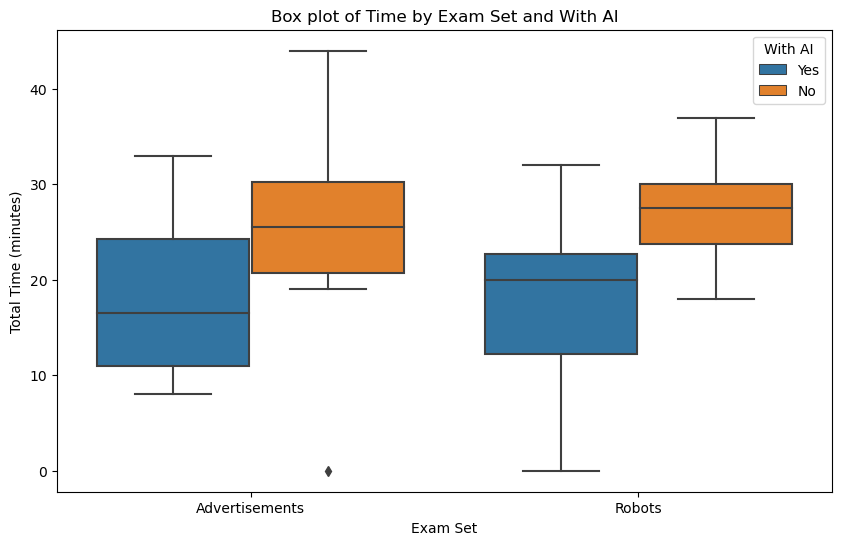

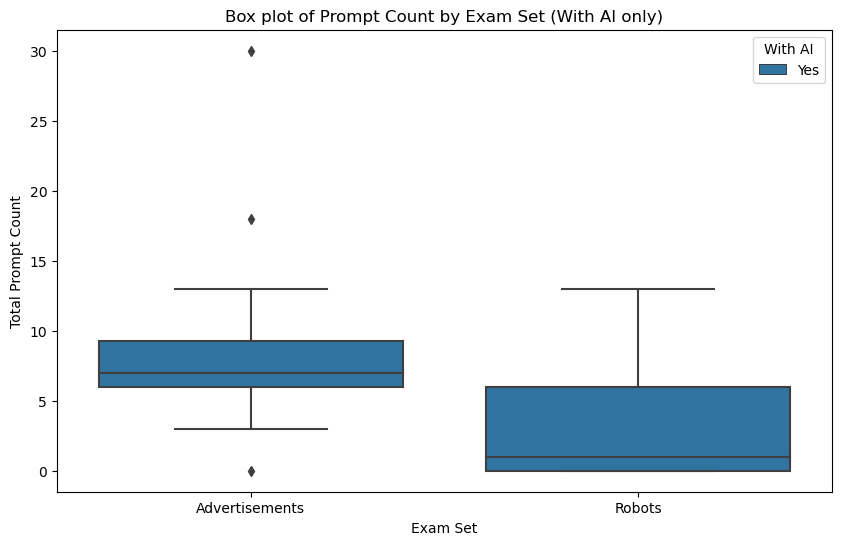

In [67]:
# Filter the DataFrame to include only rows where 'With AI' is 'Yes' or 'No'
data_with_ai = data[data['With AI'] == 'Yes']

data_filtered = data[data['With AI'].isin(['Yes', 'No'])]

# Create box plots for time
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exam Set', y='Total_Time_Minutes', hue='With AI', data=data_filtered)
plt.title('Box plot of Time by Exam Set and With AI')
plt.xlabel('Exam Set')
plt.ylabel('Total Time (minutes)')
plt.show()

# Create box plots for prompt count for exams with AI
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exam Set', y='Total_Prompt_Count', hue='With AI', data=data[data['With AI'] == 'Yes'])
plt.title('Box plot of Prompt Count by Exam Set (With AI only)')
plt.xlabel('Exam Set')
plt.ylabel('Total Prompt Count')
plt.show()



## Box plot on average time spent per task of each exam set

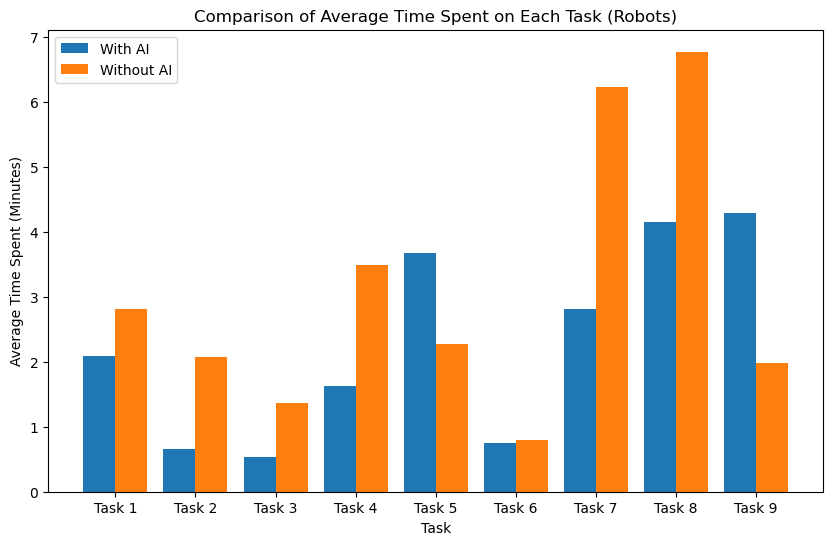

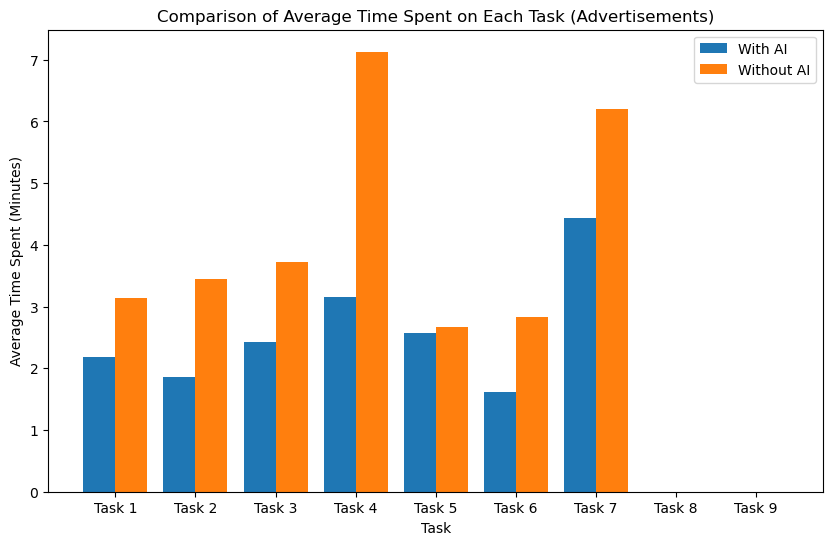

In [68]:
# Function to calculate average time spent per task
def calculate_average_time(row):
    total_time = 0
    total_cells = 0
    for task in row:
        if isinstance(task, str):
            if ',' in task:
                time_str, _ = task.split(',')
                total_time += int(time_str)
                total_cells += 1
            else:
                total_time += int(task)  # Handle case where there's only a time value
                total_cells += 1
    if total_cells == 0:
        return 0
    else:
        return total_time / (total_cells * 60)  # Convert to minutes

# Apply the function to calculate average time spent per task for both sets
avg_time_with_ai_robots = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Robots')].iloc[:, 3:12].apply(calculate_average_time, axis=0)
avg_time_without_ai_robots = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Robots')].iloc[:, 3:12].apply(calculate_average_time, axis=0)

avg_time_with_ai_ads = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Advertisements')].iloc[:, 3:12].apply(calculate_average_time, axis=0)
avg_time_without_ai_ads = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Advertisements')].iloc[:, 3:12].apply(calculate_average_time, axis=0)

# Extract task names
task_names = [f'Task {i}' for i in range(1, 10)]

# Plot for Robots
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in range(1, 10)], avg_time_with_ai_robots, width=0.4, label='With AI')
plt.bar([i + 0.2 for i in range(1, 10)], avg_time_without_ai_robots, width=0.4, label='Without AI')
plt.xlabel('Task')
plt.ylabel('Average Time Spent (Minutes)')
plt.title('Comparison of Average Time Spent on Each Task (Robots)')
plt.xticks(range(1, 10), task_names)
plt.legend()
plt.show()

# Plot for Advertisements
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in range(1, 10)], avg_time_with_ai_ads, width=0.4, label='With AI')
plt.bar([i + 0.2 for i in range(1, 10)], avg_time_without_ai_ads, width=0.4, label='Without AI')
plt.xlabel('Task')
plt.ylabel('Average Time Spent (Minutes)')
plt.title('Comparison of Average Time Spent on Each Task (Advertisements)')
plt.xticks(range(1, 10), task_names)
plt.legend()
plt.show()

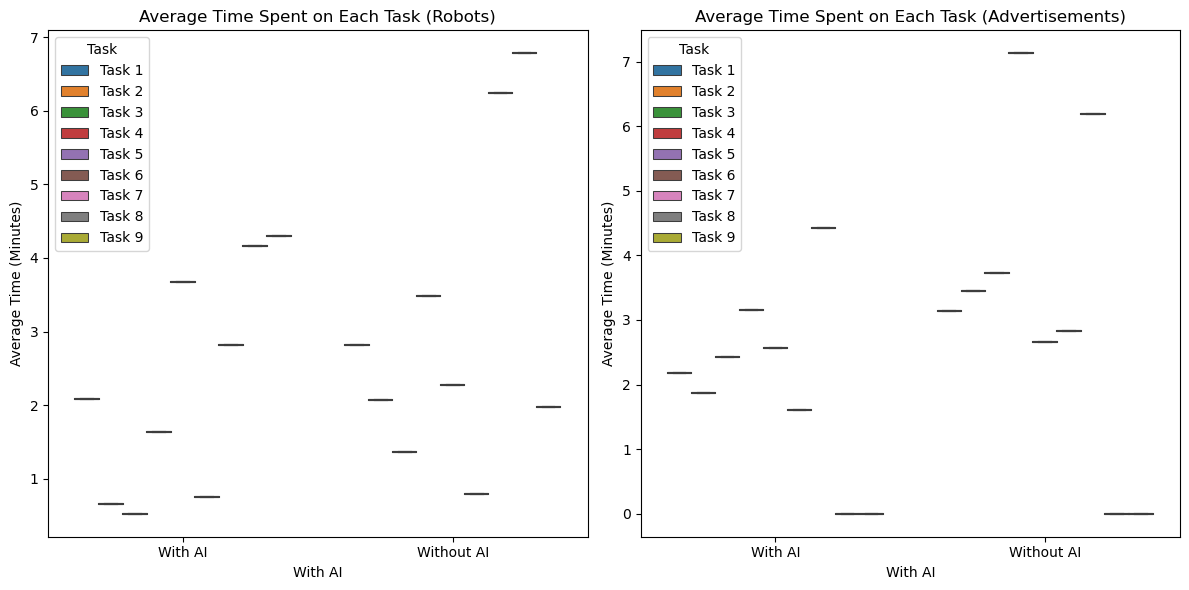

In [69]:
# Apply the function to calculate average time spent per task for both sets
avg_time_with_ai_robots = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Robots')].iloc[:, 3:12].apply(calculate_average_time, axis=0)
avg_time_without_ai_robots = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Robots')].iloc[:, 3:12].apply(calculate_average_time, axis=0)

avg_time_with_ai_ads = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Advertisements')].iloc[:, 3:12].apply(calculate_average_time, axis=0)
avg_time_without_ai_ads = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Advertisements')].iloc[:, 3:12].apply(calculate_average_time, axis=0)

# Convert the data to long format for plotting
avg_time_robots = pd.concat([avg_time_with_ai_robots, avg_time_without_ai_robots], axis=1)
avg_time_robots.columns = ['With AI', 'Without AI']
avg_time_robots['Task'] = [f'Task {i}' for i in range(1, 10)]
melted_avg_time_robots = avg_time_robots.melt(id_vars='Task', var_name='AI', value_name='Average Time (Minutes)')

avg_time_ads = pd.concat([avg_time_with_ai_ads, avg_time_without_ai_ads], axis=1)
avg_time_ads.columns = ['With AI', 'Without AI']
avg_time_ads['Task'] = [f'Task {i}' for i in range(1, 10)]
melted_avg_time_ads = avg_time_ads.melt(id_vars='Task', var_name='AI', value_name='Average Time (Minutes)')

# Create box plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='AI', y='Average Time (Minutes)', hue='Task', data=melted_avg_time_robots)
plt.title('Average Time Spent on Each Task (Robots)')
plt.xlabel('With AI')
plt.ylabel('Average Time (Minutes)')
plt.subplot(1, 2, 2)
sns.boxplot(x='AI', y='Average Time (Minutes)', hue='Task', data=melted_avg_time_ads)
plt.title('Average Time Spent on Each Task (Advertisements)')
plt.xlabel('With AI')
plt.ylabel('Average Time (Minutes)')
plt.tight_layout()
plt.show()

## Compare total time spend between the use of AI on exam sets

In [70]:
total_time_with_ai_robots = robots_with_ai['Total_Time_Minutes'].sum()
total_time_without_ai_robots = robots_without_ai['Total_Time_Minutes'].sum()

total_time_with_ai_ads = ads_with_ai['Total_Time_Minutes'].sum()
total_time_without_ai_ads = ads_without_ai['Total_Time_Minutes'].sum()

# Calculate the percentage difference for each category
percent_difference_robots = (((total_time_without_ai_robots - total_time_with_ai_robots) / total_time_with_ai_robots) * 100).round(2)
percent_difference_ads = (((total_time_without_ai_ads - total_time_with_ai_ads) / total_time_with_ai_ads) * 100).round(2)

print("Total time spent on Robots without AI:", total_time_without_ai_robots, "minutes")
print("Total time spent on Robots with AI:", total_time_with_ai_robots, "minutes")
print("Total time used on tasks without AI in Robots are", percent_difference_robots, "% longer than with AI")

print("\nTotal time spent on Advertisements without AI:", total_time_without_ai_ads, "minutes")
print("Total time spent on Advertisements with AI:", total_time_with_ai_ads, "minutes")
print("Total time used on tasks without AI in Advertisements are", percent_difference_ads, "% longer than with AI")



Total time spent on Robots without AI: 322.0 minutes
Total time spent on Robots with AI: 177.0 minutes
Total time used on tasks without AI in Robots are 81.92 % longer than with AI

Total time spent on Advertisements without AI: 249.0 minutes
Total time spent on Advertisements with AI: 215.0 minutes
Total time used on tasks without AI in Advertisements are 15.81 % longer than with AI


The Robots tasks show a much larger difference in time spent with versus without AI (81.92% longer without AI) compared to the Advertisements tasks (15.81% longer without AI). This substantial difference in the Robots category likely contributes to a lower P-value, indicating a statistically significant difference when AI is used.

## Statistically significan analysis

In [71]:
# For robots with AI
times_with_ai_robots = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Robots')]['Total_Time_Minutes'].values

# For robots without AI
times_without_ai_robots = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Robots')]['Total_Time_Minutes'].values

# Conduct the t-test
t_stat, p_value = ttest_ind(times_with_ai_robots, times_without_ai_robots)

print(f"T-statistic for exam set with Robots: {t_stat}, P-value: {p_value}")

# For robots with AI
times_with_ai_adv = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Advertisements')]['Total_Time_Minutes'].values

# For robots without AI
times_without_ai_adv = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Advertisements')]['Total_Time_Minutes'].values

# Conduct the t-test
t_stat, p_value = ttest_ind(times_with_ai_adv, times_without_ai_adv)

print(f"T-statistic for exam set with Advertisements: {t_stat}, P-value: {p_value}")


T-statistic for exam set with Robots: -2.981419557556401, P-value: 0.007377889236266885
T-statistic for exam set with Advertisements: -1.6707693235468002, P-value: 0.11034307476241376


Robots Exam Set
T-statistic: -2.981
P-value: 0.0074
The negative T-statistic indicates that the mean time spent on tasks with AI assistance is lower than without AI assistance, suggesting a performance improvement with AI. The P-value is less than the typical significance level (α = 0.05), indicating a statistically significant difference in mean task completion times between participants with and without AI assistance. Therefore, you have enough evidence to reject the null hypothesis, supporting the claim that AI assistance leads to faster task completion in the "Robots" exam set.

Advertisements Exam Set
T-statistic: -1.671
P-value: 0.1103
Here, the negative T-statistic again suggests that tasks with AI assistance were completed faster on average than those without. However, the P-value is above 0.05, indicating that the difference in mean completion times between the two groups is not statistically significant at the conventional 5% level. Thus, you do not have sufficient evidence to reject the null hypothesis for the "Advertisements" exam set, meaning the impact of AI on performance efficiency is not conclusively demonstrated in this context.

Overall Interpretation
The difference in outcomes between the two exam sets highlights an important aspect of AI assistance: its impact may vary significantly depending on the type of task or context. In the "Robots" exam set, AI assistance appears to significantly improve efficiency, while in the "Advertisements" set, the improvement isn't statistically significant.

This could suggest several possibilities:

Task Complexity: The nature or complexity of tasks in the "Advertisements" exam set might not benefit as much from AI assistance, or the way AI is applied may not be as effective for these types of tasks.
AI Implementation: The implementation or integration of AI into the task workflow could vary between exam sets, possibly being more optimized for tasks in the "Robots" set.
Participant Variability: Differences in participant groups between exam sets, if any, could also influence the effectiveness of AI assistance.
These results underscore the importance of context and task characteristics in evaluating the effectiveness of AI assistance. Further investigation could explore why AI assistance shows a significant impact in one area but not another, potentially leading to more tailored and effective uses of AI across various fields.

## Participant-Level Analysis
### Kombiner data fra pre-questionarie til at lave yderligere analyse.

### Analyze how participants' experience levels across different domains (development, IDE, language, LLM) correlate with their performance or perceived task difficulty. This could help determine if AI is more beneficial for certain experience levels

### Assess if the recency of coding activity (measured in months since last coding in Java) impacts task performance or preferences for using AI. This could highlight whether fresher coding experience influences the effectiveness of AI assistance.

### Conduct subgroup analyses to compare task performance and AI effectiveness across different levels of experience. This could reveal whether AI tools are particularly advantageous for novices, intermediates, or experts in coding.

### Correlation Analysis: Examine correlations between continuous variables (e.g., number of years of development experience) and task performance metrics to identify significant relationships.